## Lead Case Stduy Assignment 

In [1]:
## Supress Warning
import warnings
warnings.filterwarnings('ignore')
### Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Visualaisation
from matplotlib.pyplot import xticks
%matplotlib inline

### Data Dispaly coustmization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)


## Load Data

In [2]:
load_df = pd.read_csv('Leads.csv')

In [3]:
load_df.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
## DataFrame Shape
load_df.shape

(9240, 37)

## Data Inspection

In [5]:
## In DataSet showing missing values
load_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
## Describe Data set
load_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Checking Duplicates

In [7]:
## No duplicate value exist after inspection on variable "Prospect ID"
sum(load_df.duplicated(subset='Prospect ID'))

0

## checking missing values and clean data
#### We have observed that many of variable has "select" values , that means user did not select any option and fill it as "select" auto fill.

In [8]:
len(load_df.index)

9240

In [9]:
# neet to clean following columns "Specialization", "How did you hear about X Education", "Lead Profile", "City"

#(load_df == 'Select').any(axis=0) == True





In [10]:
#load_df.replace(to_replace='Select' , value = np.nan, inplace= True)
load_df = load_df.replace('Select', np.nan)

In [11]:
## check missing values in percentage every columns
round(100*(load_df.isnull().sum(axis = 0)/len(load_df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [12]:
## Drop column which has more than 70 % Missing values
#load_df.loc[:,list(round(100*(load_df.isnull().sum()/len(load_df.index)),2) > 65)].columns
load_df = load_df.drop(['How did you hear about X Education','Lead Profile'], axis =1)
len(load_df.columns)

35

In [13]:
## Check columns  one by one to handel missing valules
### Let work on "Lead Quality" 
#print(load_df['Lead Quality'].head(10))
load_df['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

In [14]:
load_df['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [15]:
## Justification : since this column has information on the base of judgment of lead head on candidate. hence we are
##assuming that lead head not enter any detail,as he was not sure or did not get any intution about candidate.
## We are going to fill this column value "Not Sure".
load_df['Lead Quality'] = load_df['Lead Quality'].fillna('Not Sure')

In [16]:
print(load_df['Lead Quality'].isnull().any())
load_df['Lead Quality'].value_counts()

False


Not Sure             5859
Might be             1560
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [17]:
load_df['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [18]:
load_df['Asymmetrique Activity Score'].value_counts()

14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64

In [19]:
load_df['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [20]:
load_df['Asymmetrique Profile Score'].value_counts()

15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64

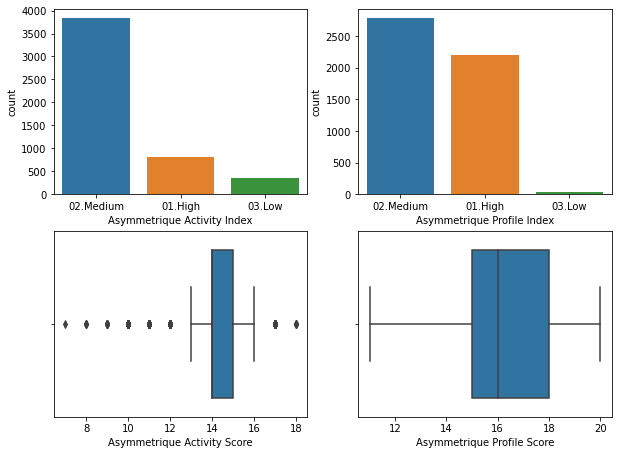

In [21]:
fig , axs = plt.subplots(2,2 ,  figsize = (10,7.5))
act_index = sns.countplot(load_df['Asymmetrique Activity Index'], ax = axs[0,0])
act_score = sns.boxplot(load_df['Asymmetrique Activity Score'], ax = axs[1,0])
pro_index = sns.countplot(load_df['Asymmetrique Profile Index'], ax = axs[0,1])
pro_score = sns.boxplot(load_df['Asymmetrique Profile Score'], ax = axs[1,1])
#plt.tight_layout()
plt.show()


In [22]:
### There above variable have more than 45% missing values and as per above evedince, there is not any insight 
### in these variables so drop them will be good.
load_df= load_df.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'], axis =1)



In [23]:
## Let work on variable "city"
load_df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object


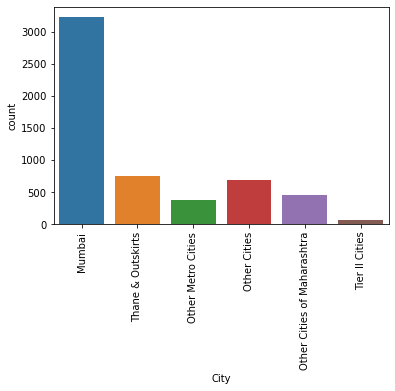

In [24]:
print(load_df.City.describe())
sns.countplot(load_df['City'])
xticks(rotation = 90)
plt.show()

In [25]:
#load_df[load_df[['Country']] != 'India']
load_df.loc[load_df['Country'] != 'India']['City'].value_counts()


Mumbai                         304
Other Cities                   122
Thane & Outskirts              101
Other Cities of Maharashtra     66
Other Metro Cities              35
Tier II Cities                   5
Name: City, dtype: int64

In [26]:
load_df.loc[load_df['Country'] != 'India']['City'].isnull().sum()/len(load_df['City'].index)

0.2288961038961039

In [27]:
load_df['City'].isnull().sum()/len(load_df.index)

0.3970779220779221

In [28]:
#Since mode of "City" is "Mumbai", so we are going replace nan to 'Mumbai'
#load_df['City'].value_counts()
load_df['City'] = load_df['City'].replace(np.nan, 'Mumbai')

In [29]:
print(load_df['City'].isnull().sum()/len(load_df.index))
load_df['City'].isnull().sum()

0.0


0

In [30]:
load_df['Tags'].describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [31]:
load_df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object


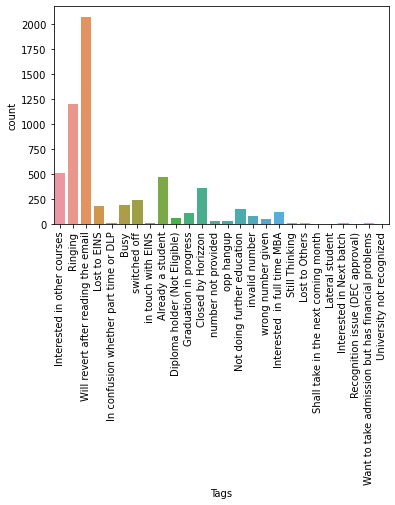

In [32]:
print(load_df.Tags.describe())
sns.countplot(load_df['Tags'])
xticks(rotation = 90)
plt.show()

In [33]:
## Frequency of 'Tags' varaiable is 'Will revert after reading the email'
## fill 'NaN' value from most frequent variable

load_df['Tags'] = load_df['Tags'].replace(np.nan, 'Will revert after reading the email')
load_df['Tags'].isnull().sum()

0

In [34]:
load_df['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


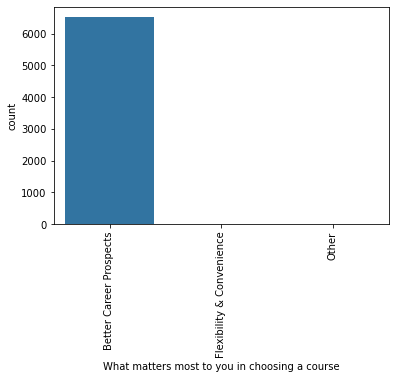

In [35]:
print(load_df['What matters most to you in choosing a course'].value_counts())
sns.countplot(load_df['What matters most to you in choosing a course'])
xticks(rotation = 90)
plt.show()


In [36]:
load_df['What matters most to you in choosing a course'] = load_df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')
load_df['What matters most to you in choosing a course'].isnull().sum()

0

In [37]:
load_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object


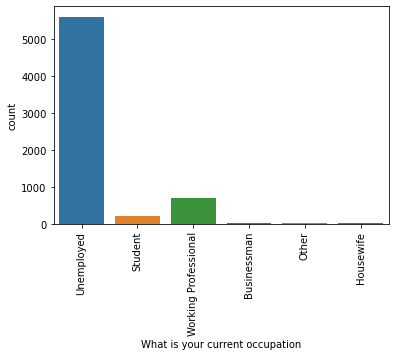

In [38]:
print(load_df['What is your current occupation'].describe())
sns.countplot(load_df['What is your current occupation'])
xticks(rotation = 90)
plt.show()

In [39]:
load_df['What is your current occupation'] = load_df['What is your current occupation'].replace(np.nan , 'Unemployed')
load_df['What is your current occupation'].isnull().sum()

0

In [40]:
load_df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text major ticklabel objects>)

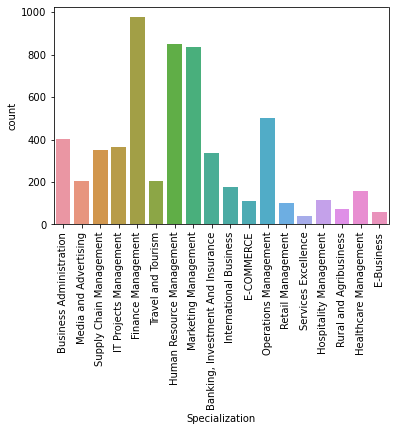

In [41]:
sns.countplot(load_df['Specialization'])
xticks(rotation = 90)

In [42]:
load_df['Specialization'] = load_df['Specialization'].replace(np.nan , 'Not-Define')
load_df['Specialization'].isnull().sum()

0

In [43]:
load_df['Country'].value_counts()/load_df['Country'].count()
#load_df['Country'].count()

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
Germany                 0.000590
Canada                  0.000590
Kuwait                  0.000590
South Africa            0.000590
Nigeria                 0.000590
Sweden                  0.000443
Belgium                 0.000295
Philippines             0.000295
Ghana                   0.000295
Bangladesh              0.000295
China                   0.000295
Netherlands             0.000295
Italy                   0.000295
Uganda                  0.000295
Asia/Pacific Region     0.000295
Indonesia               0.000148
Russia                  0.000148
Liberia   

In [44]:
load_df['Country'] = load_df['Country'].replace(np.nan , 'India')

In [45]:
load_df['Last Activity'].describe()

count             9137
unique              17
top       Email Opened
freq              3437
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

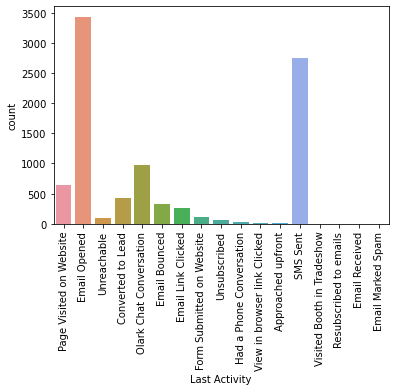

In [46]:
sns.countplot(load_df['Last Activity'])
xticks(rotation = 90)

In [47]:
load_df['Last Activity'] = load_df['Last Activity'].replace(np.nan , 'Email Opened')
load_df['Last Activity'].isnull().sum()

0

In [48]:
load_df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [49]:
#print(load_df['Page Views Per Visit'].mode)

load_df['Page Views Per Visit'] = load_df['Page Views Per Visit'].replace(np.nan , 0.00)
load_df['Page Views Per Visit'].isnull().sum()

0

In [50]:
round(100*(load_df.isnull().sum(axis = 0)/len(load_df.index)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.00
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [51]:
## Let drop rows as null value less than 3 %

load_df = load_df.dropna()
round(100*(load_df.isnull().sum(axis = 0)/len(load_df.index)),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [52]:
### Save datafram with new name
df2 = load_df.copy()
#load_df.head(10)

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [54]:
## Inspection new DataFrame "df2" 
## We will start analyize from here , using "df2"
df2.shape
print(df2.shape[0]/9240)

0.982034632034632


In [55]:
df2.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Not-Define,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Not-Define,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Not-Define,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


### find numarical and categorial variable in datasets

In [56]:
df2.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                                          object
Newspaper Article              

In [57]:
# Numariacl variables
#numarical_df = df2.dtypes[df2.dtypes != 'object'].index
#numarical_df = pd.DataFrame(numarical_df.values.reshape(-1), columns=['num_var'])
#numarical_df


In [58]:
## Categorial variables 
#cat_df = df2.dtypes[df2.dtypes == 'object'].index
#cat_df = pd.DataFrame(cat_df.values.reshape(-1), columns= ['cat_var'])
#cat_df

# Bivariante Analyise, Conver data into dummy variable
## Handle outliers

In [59]:
target = df2[['Converted']].columns.values

### TotalVisits outliers

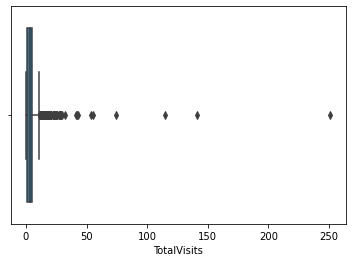

In [60]:
##TotalVisits
sns.boxplot(df2['TotalVisits'])

In [61]:
bins = [.1,.5,.7,.9,.95,.99]
df2['TotalVisits'].describe(percentiles = bins)

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
10%         0.000000
50%         3.000000
70%         4.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [62]:
min_q = df2.TotalVisits.quantile(0.0)
max_q = df2.TotalVisits.quantile(0.97)

#sns.boxplot(y = 'TotalVisits', hue = 'Converted' , data = df2)

In [63]:
#df2 = df2.loc[(df2.TotalVisits > min_q) & (df2.TotalVisits < max_q)]
percentiles = df2['TotalVisits'].quantile([0.05,0.95]).values
df2['TotalVisits'][df2['TotalVisits'] <= percentiles[0]] = percentiles[0]
df2['TotalVisits'][df2['TotalVisits'] >= percentiles[1]] = percentiles[1]
df2.shape

(9074, 31)

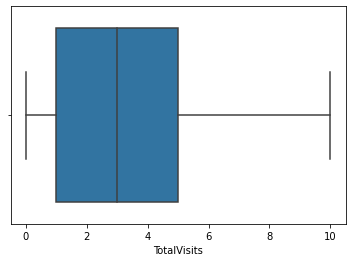

In [64]:
sns.boxplot(x = 'TotalVisits' , hue = 'Converted' , data = df2)

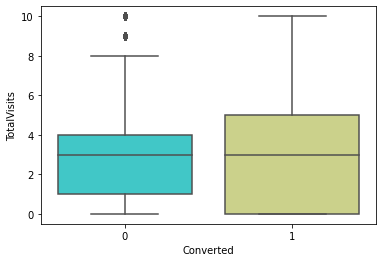

In [65]:
sns.boxplot(x='Converted',y='TotalVisits',data=df2,palette='rainbow')

In [66]:
## Total Time Spent on Website
df2['Total Time Spent on Website'].describe(percentiles = bins)

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
10%         0.000000
50%       246.000000
70%       693.000000
90%      1373.000000
95%      1557.000000
99%      1839.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

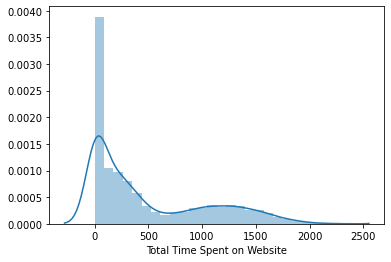

In [67]:
sns.distplot(df2['Total Time Spent on Website'])

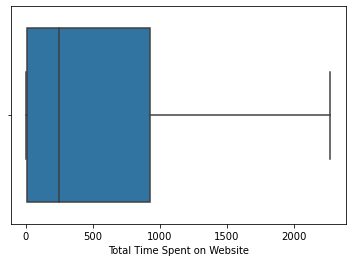

In [68]:
sns.boxplot(x= df2['Total Time Spent on Website'])

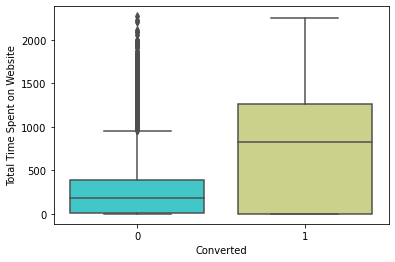

In [69]:
sns.boxplot(x='Converted',y='Total Time Spent on Website',data=df2,palette='rainbow')

### Page Views Per Visit Outlier detected

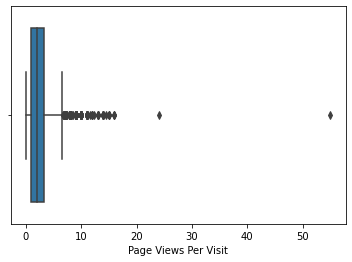

In [70]:
### Page Views Per Visit
sns.boxplot(x= df2['Page Views Per Visit'])

In [71]:
#min_q = df2['Page Views Per Visit'].quantile(0.01)
#max_q = df2['Page Views Per Visit'].quantile(0.99)
#df2 = df2.loc[(df2['Page Views Per Visit'] > min_q) & (df2['Page Views Per Visit'] < max_q)]
percentiles = df2['Page Views Per Visit'].quantile([0.05,0.96]).values
df2['Page Views Per Visit'][df2['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df2['Page Views Per Visit'][df2['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]
df2.shape

(9074, 31)

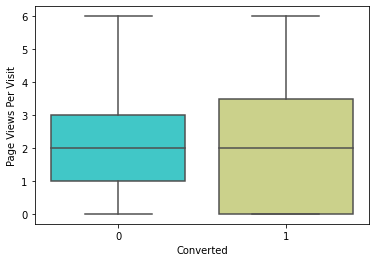

In [72]:
sns.boxplot(x='Converted',y='Page Views Per Visit',data=df2,palette='rainbow')

### "Do Not Mail"
Insights : Leads showing interset to email them regarding of course

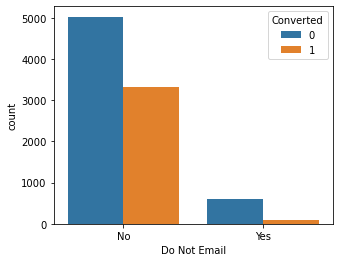

In [73]:
fig , axs = plt.subplots(figsize = (5,4))
sns.countplot(x = 'Do Not Email' ,hue = 'Converted', data=df2)
plt.show()

## Do Not Call
Insight :


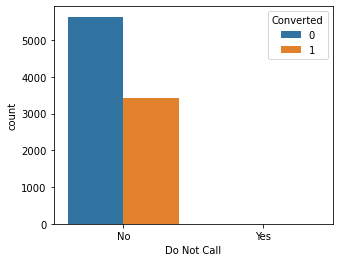

In [74]:
fig , axs = plt.subplots(figsize = (5,4))
sns.countplot(x = 'Do Not Call' ,hue = 'Converted', data=df2)
plt.show()

## Last Activity
Insight: Most of lead send SMS to query course and open mailed to get know about course.

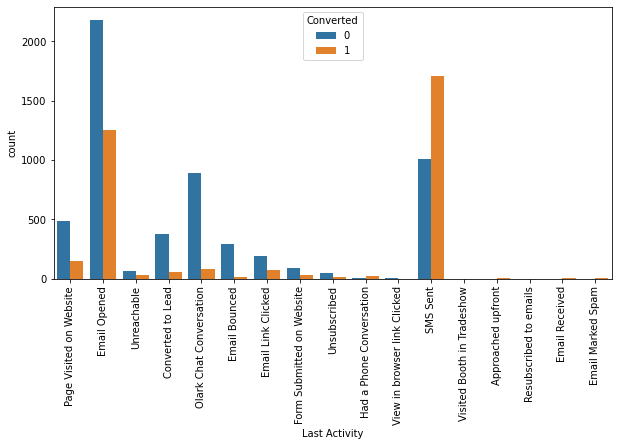

In [75]:
fig , axs = plt.subplots(figsize = (10,5))
sns.countplot(x = 'Last Activity' ,hue = 'Converted', data=df2)
xticks(rotation = 90)
plt.show()

## Country
Insight : Almost all leads belong to INDIA


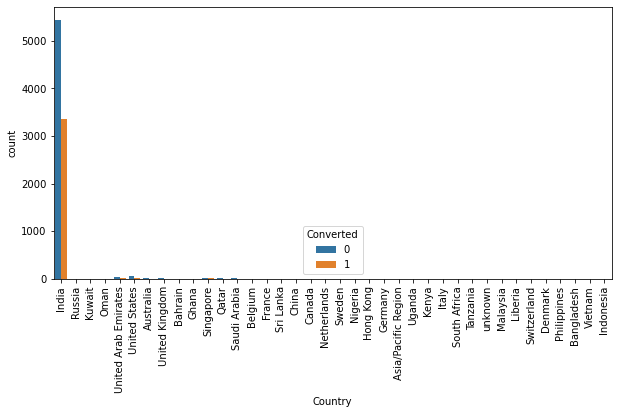

In [76]:
fig , axs = plt.subplots(figsize = (10,5))
sns.countplot(x = 'Country' ,hue = 'Converted', data=df2)
xticks(rotation = 90)
plt.show()

## As insight of the "Country" Variables, Only "India" have strength of leads. we are going 
## less usefull countries to the others.

In [77]:
df2['Country'] = df2['Country'].replace(['Kuwait','Oman','Bahrain','Ghana','Belgium','France','Sri Lanka','China','Canada','Nigera','Hong Kong','Germany','Sweden','Uganda','Kenya','Italy','South Africa','Tanzania','Unkown','Malaysia','Netherland','Denmark','Swizerland','Philippines','Bangladesh','Vietnam','Indonesia'],'Other_country')

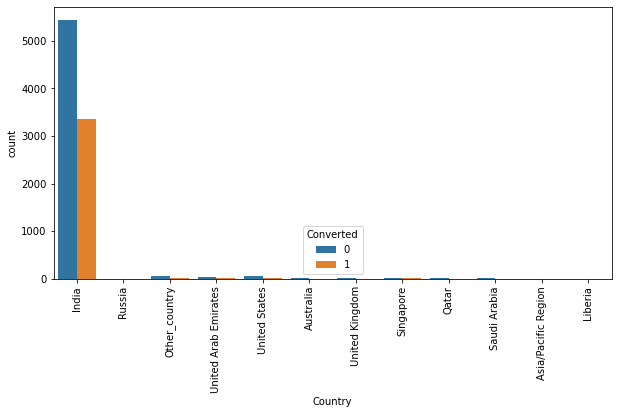

In [78]:
df2['Country'] = df2['Country'].replace(['Nigeria','unknown','Netherlands','Switzerland'],'Other_country')
fig , axs = plt.subplots(figsize = (10,5))
sns.countplot(x = 'Country' ,hue = 'Converted', data=df2)
xticks(rotation = 90)
plt.show()

## Specialization
Insight :

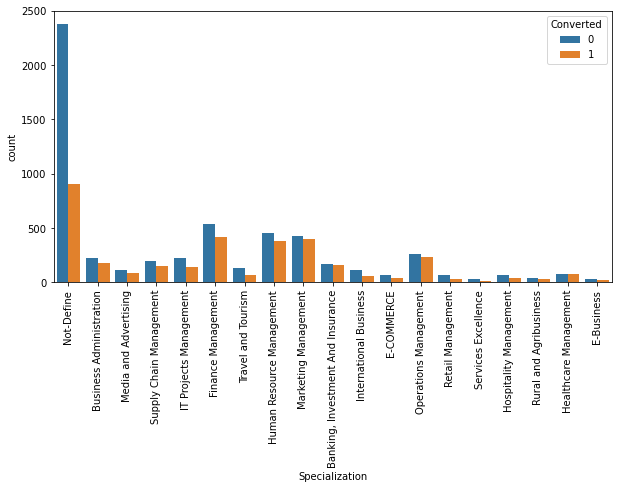

In [79]:
fig , axs = plt.subplots(figsize = (10,5))
sns.countplot(x = 'Specialization' ,hue = 'Converted', data=df2)
xticks(rotation = 90)
plt.show()

## What is your current occupation
Insight : "Unemployed" looks like move to more lead.

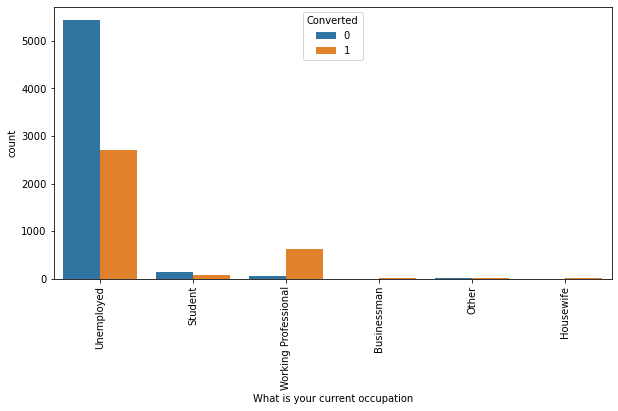

In [80]:
fig , axs = plt.subplots(figsize = (10,5))
sns.countplot(x = 'What is your current occupation' ,hue = 'Converted', data=df2)
xticks(rotation = 90)
plt.show()

## What matters most to you in choosing a course
Insight : no variation in this feature so its good to drop this feature

In [81]:
df2['What matters most to you in choosing a course'].value_counts()
df2[['What matters most to you in choosing a course']].nunique()

What matters most to you in choosing a course    3
dtype: int64

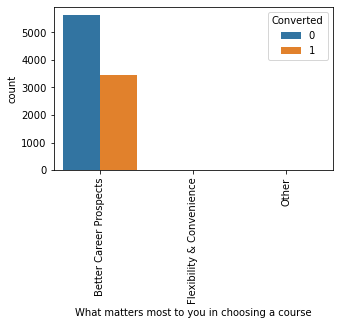

In [82]:
fig , axs = plt.subplots(figsize = (5,3))
sns.countplot(x = 'What matters most to you in choosing a course' ,hue = 'Converted', data=df2)
xticks(rotation = 90)
plt.show()

## Search
Insight :


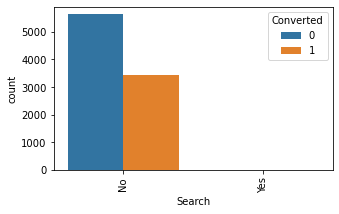

In [83]:
fig , axs = plt.subplots(figsize = (5,3))
sns.countplot(x = 'Search' ,hue = 'Converted', data=df2)
xticks(rotation = 90)
plt.show()

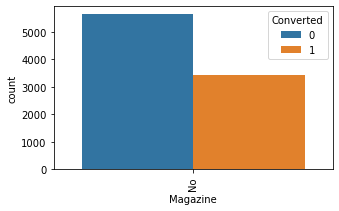

In [84]:
fig , axs = plt.subplots(figsize = (5,3))
sns.countplot(x = 'Magazine' ,hue = 'Converted', data=df2)
xticks(rotation = 90)
plt.show()

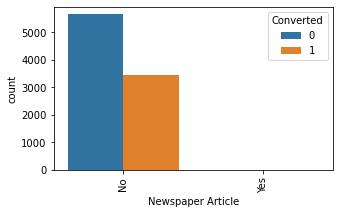

In [85]:
fig , axs = plt.subplots(figsize = (5,3))
sns.countplot(x = 'Newspaper Article' ,hue = 'Converted', data=df2)
xticks(rotation = 90)
plt.show()

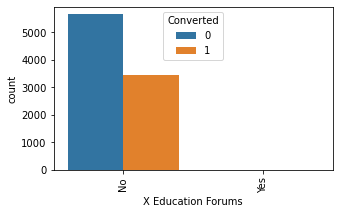

In [86]:
fig , axs = plt.subplots(figsize = (5,3))
sns.countplot(x = 'X Education Forums' ,hue = 'Converted', data=df2)
xticks(rotation = 90)
plt.show()

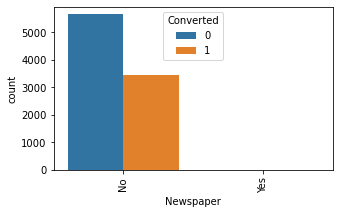

In [87]:
fig , axs = plt.subplots(figsize = (5,3))
sns.countplot(x = 'Newspaper' ,hue = 'Converted', data=df2)
xticks(rotation = 90)
plt.show()

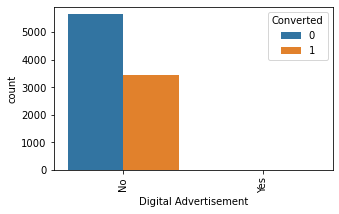

In [88]:
fig , axs = plt.subplots(figsize = (5,3))
sns.countplot(x = 'Digital Advertisement' ,hue = 'Converted', data=df2)
xticks(rotation = 90)
plt.show()

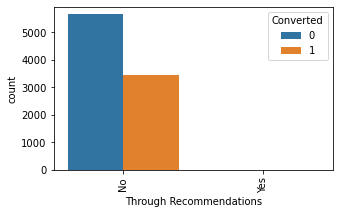

In [89]:
fig , axs = plt.subplots(figsize = (5,3))
sns.countplot(x = 'Through Recommendations' ,hue = 'Converted', data=df2)
xticks(rotation = 90)
plt.show()

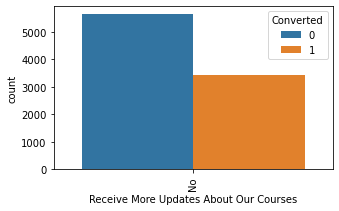

In [90]:
fig , axs = plt.subplots(figsize = (5,3))
sns.countplot(x = 'Receive More Updates About Our Courses' ,hue = 'Converted', data=df2)
xticks(rotation = 90)
plt.show()

## Tags
Insight : More leads are which ready to read mails.

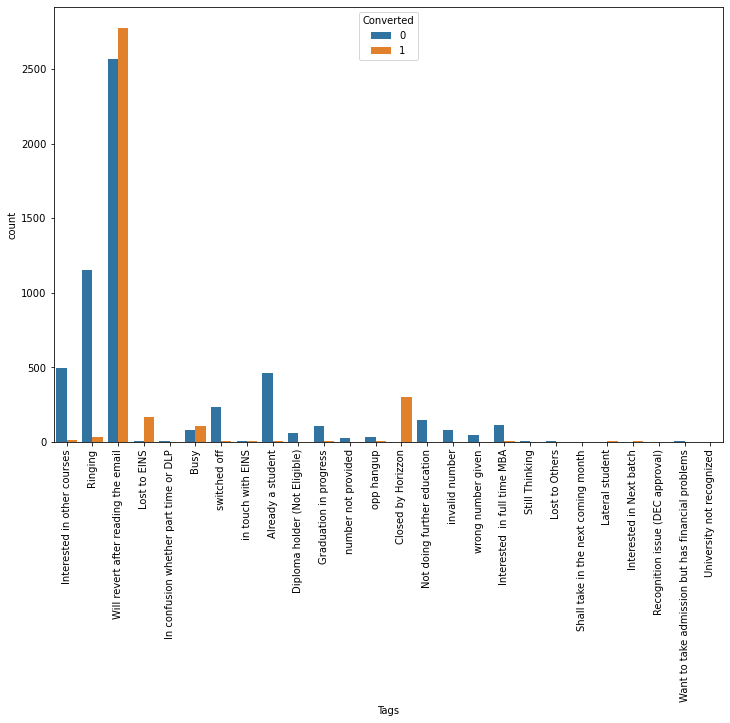

In [91]:
fig , axs = plt.subplots(figsize = (12,8))
sns.countplot(x = 'Tags' ,hue = 'Converted', data=df2)
xticks(rotation = 90)
plt.show()

## Lead Quality
Insight : "Might be" has more change to convert in Lead.

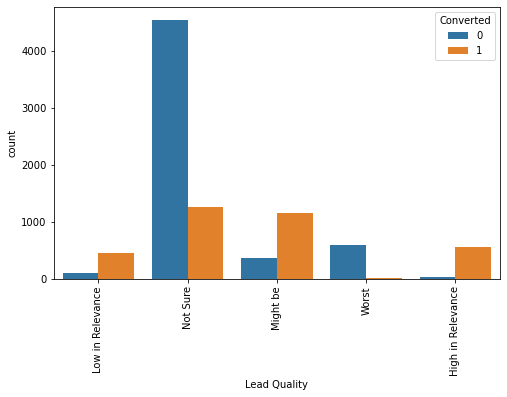

In [92]:
fig , axs = plt.subplots(figsize = (8,5))
sns.countplot(x = 'Lead Quality' ,hue = 'Converted', data=df2)
xticks(rotation = 90)
plt.show()

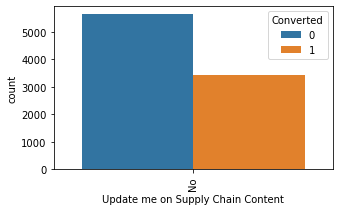

In [93]:
## Update me on Supply Chain Content
fig , axs = plt.subplots(figsize = (5,3))
sns.countplot(x = 'Update me on Supply Chain Content' ,hue = 'Converted', data=df2)
xticks(rotation = 90)
plt.show()


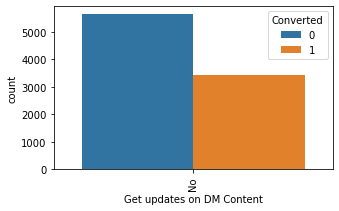

In [94]:
##Get updates on DM Content
fig , axs = plt.subplots(figsize = (5,3))
sns.countplot(x = 'Get updates on DM Content' ,hue = 'Converted', data=df2)
xticks(rotation = 90)
plt.show()

## City
Insight : "Mumbai" city  lead more converts.

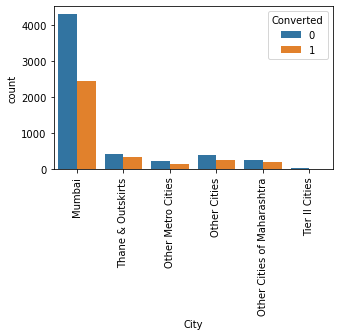

In [95]:
#### City
fig , axs = plt.subplots(figsize = (5,3))
sns.countplot(x = 'City' ,hue = 'Converted', data=df2)
xticks(rotation = 90)
plt.show()


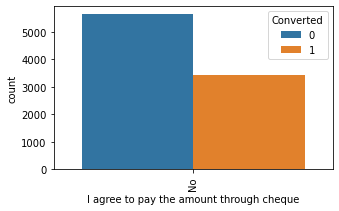

In [96]:
#### 'I agree to pay the amount through cheque'
fig , axs = plt.subplots(figsize = (5,3))
sns.countplot(x = 'I agree to pay the amount through cheque' ,hue = 'Converted', data=df2)
xticks(rotation = 90)
plt.show()

## A free copy of Mastering The Interview

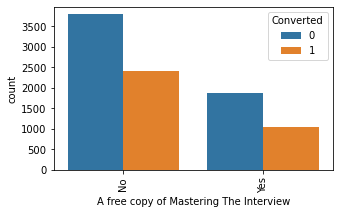

In [97]:
#### A free copy of Mastering The Interview
fig , axs = plt.subplots(figsize = (5,3))
sns.countplot(x = 'A free copy of Mastering The Interview' ,hue = 'Converted', data=df2)
xticks(rotation = 90)
plt.show()

## Last Notable Activity

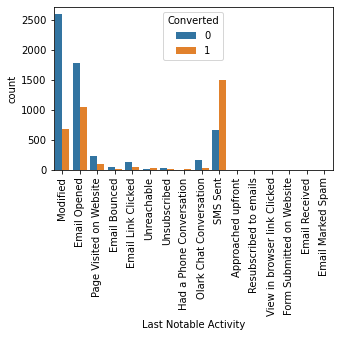

In [98]:
## Last Notable Activity
fig , axs = plt.subplots(figsize = (5,3))
sns.countplot(x = 'Last Notable Activity' ,hue = 'Converted', data=df2)
xticks(rotation = 90)
plt.show()


## Since we found in inspection that some featuers are not contributing to convert as lead.
## We are going to drop them to make more relaiable and flexible model.

In [99]:
unused_variable = ['Lead Number','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses','Through Recommendations','Digital Advertisement','Newspaper','X Education Forums','Newspaper Article','Magazine','Search','What matters most to you in choosing a course']
df2 = df2.drop(unused_variable , axis=1)
#df2 = df2.drop('I agree to pay the amount through cheque',axis =1)
df2.shape

(9074, 18)

In [100]:
df2.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

### New DataFrame "Cleaned_df"

In [101]:
clean_df = df2.copy()
print(clean_df.shape)
clean_df.info()

(9074, 18)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Do Not Email                            9074 non-null   object 
 4   Do Not Call                             9074 non-null   object 
 5   Converted                               9074 non-null   int64  
 6   TotalVisits                             9074 non-null   float64
 7   Total Time Spent on Website             9074 non-null   int64  
 8   Page Views Per Visit                    9074 non-null   float64
 9   Last Activity                           9074 non-null   object 
 10  Country                                 9074 non-

## Create Dummy Variables

### Convert some variables to 1/0

In [102]:
mylist = ['Do Not Email','Do Not Call','A free copy of Mastering The Interview']
def conver_var(lst):
    return lst.map({'Yes' :1 , 'No' :0})

clean_df[mylist] = clean_df[mylist].apply(conver_var)
clean_df[mylist].head(10)

,Do Not Email,Do Not Call,A free copy of Mastering The Interview
0,0,0,0
1,0,0,0
2,0,0,1
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,1
9,0,0,0


In [103]:
#clean_df.info()

### For categorial variables 

In [104]:
my_dummy_variables = pd.get_dummies(clean_df[['Lead Origin', 'Lead Source', 'Last Activity','Country', 'Specialization', 'What is your current occupation', 'Last Notable Activity','Tags','Lead Quality', 'City']],drop_first=True)
my_dummy_variables.head(10)

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_India,Country_Liberia,Country_Other_country,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,...,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0

In [105]:
## Concatinate dummy and original data set

clean_df = pd.concat([clean_df , my_dummy_variables], axis =1)
clean_df.head(5)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,...,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Not-Define,Unemployed,Interested in other courses,Low in Relevance,Mumbai,0,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Not-Define,Unemployed,Ringing,Not Sure,Mumbai,0,Email Opened,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [106]:
### Drop Origenal Features
O_var = ['Lead Origin', 'Lead Source', 'Last Activity','Country', 'Specialization', 'What is your current occupation','Last Notable Activity', 'Tags','Lead Quality', 'City']
clean_df = clean_df.drop(O_var , axis =1)
clean_df.head(4)


,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_India,Country_Liberia,...,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [107]:
clean_df.shape

(9074, 130)

In [108]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Columns: 130 entries, Prospect ID to City_Tier II Cities
dtypes: float64(2), int64(5), object(1), uint8(122)
memory usage: 1.7+ MB


## Test-Train Split 

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X = clean_df.drop(['Prospect ID','Converted'], axis =1)
X.head(2)

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_India,Country_Liberia,Country_Other_country,Country_Qatar,...,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [111]:
Y = clean_df['Converted']
Y.head(2)

0    0
1    0
Name: Converted, dtype: int64

In [112]:
## Spliting Dataset into train and test
X_train , X_test , Y_train, Y_test = train_test_split(X,Y, train_size = 0.7, test_size = 0.3, random_state = 100)

## Feature Scaling

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head(5)

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_India,Country_Liberia,Country_Other_country,Country_Qatar,...,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3009,0,0,-0.432779,-0.160255,-0.155018,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
7987,0,0,0.643547,2.017593,0.122613,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [115]:
### Check Lead converted rate
lead_rate = (sum(clean_df['Converted'])/len(clean_df['Converted'].index))
lead_rate

0.3785541106458012

Almost 37 % Lead converted rate

## Correlation between the variables

In [116]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
#sns.heatmap(clean_df.corr(),annot = True)
plt.show()

<Figure size 1440x720 with 0 Axes>

# Model Building

In [117]:
## Running on First Training Model
import statsmodels.api as sm

In [118]:
## Logistic Regression Model
lm1 = sm.GLM(Y_train, (sm.add_constant(X_train)), family= sm.families.Binomial())
lm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6225
Model Family:                Binomial   Df Model:                          125
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1230.4
Date:                Tue, 13 Apr 2021   Deviance:                       2460.9
Time:                        13:49:12   Pearson chi2:                 3.98e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     29.9888   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Do Not Email                                              -1.3963      0.339     -4.119      0.000      -2.061      -0.732
Do Not Call                                               23.6270   1.36e+05      0.000      1.000   -2.67e+05    2.67e+05
TotalVisits                                                0.1926      0.088      2.182      0.029       0.020       0.365
Total Time Spent on Website                                1.1504      0.064     17.886      0.000       1.024       1.276
Page Views Per Visit                                      -0.3293      0.100     -3.285      0.001      -0.526      -0.133
A free copy of Mastering The Interview                    -0.2432      0.179     -1.356      0.175      -0.595       0.108
Lead Origin_Landing Page Submission                       -0.9747      0.226     -4.315      0.000      -1.417      -0.532
Lead Origin_Lead Add Form                                 -2.9170      3.477     -0.839      0.401      -9.731       3.897
Lead Origin_Lead Import                                   27.2280   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Direct Traffic                                -3.4292      4.165     -0.823      0.410     -11.593       4.734
Lead Source_Facebook                                     -29.6821   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                        -3.3396      4.164     -0.802      0.422     -11.500       4.821
Lead Source_Live Chat                                     23.8152   1.39e+05      0.000      1.000   -2.73e+05    2.73e+05
Lead Source_NC_EDM                                        22.3538   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Olark Chat                                    -2.5954      4.156     -0.624      0.532     -10.741       5.550
Lead Source_Organic Search                                -3.2859      4.167     -0.789      0.430     -11.452       4.881
Lead Source_Pay per Click Ads                            -21.4121   2.16e+05  -9.91e-05      1.000   -4.23e+05    4.23e+05
Lead Source_Press_Release                                -26.0990   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Reference                                      0.8516      2.302      0.370      0.711      -3.661       5.364
Lead Source_Referral Sites                                -3.5962      4.191     -0.858      0.391     -11.810       4.617
Lead Source_Social Media                                  -0.1300      8.131     -0.016      0.987     -16.066      15.806
Lead Sou

In [119]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [120]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train.columns
#vif = pd.DataFrame()
#vif['Features'] = X_train[col].columns
#vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
#vif['VIF'] = round(vif['VIF'], 2)
#vif = vif.sort_values(by = "VIF", ascending = False)
#vif

## RFE - Feature Selection

In [121]:
## Feature Selction using RFE

from sklearn.linear_model import LogisticRegression
r1 = LogisticRegression()

In [122]:
from sklearn.feature_selection import RFE
rfe1 = RFE(r1 , 20)
rfe1 = rfe1.fit(X_train, Y_train)
rfe1.support_

array([ True, False, False,  True, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False,  True,  True, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False,  True, False,  True,  True, False,
        True,  True, False, False,  True,  True, False, False, False,
       False, False]

In [123]:
list(zip(X_train.columns , rfe1.support_ , rfe1.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 48),
 ('TotalVisits', False, 59),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 57),
 ('A free copy of Mastering The Interview', False, 58),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 44),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 46),
 ('Lead Source_Live Chat', False, 76),
 ('Lead Source_NC_EDM', False, 24),
 ('Lead Source_Olark Chat', False, 2),
 ('Lead Source_Organic Search', False, 45),
 ('Lead Source_Pay per Click Ads', False, 108),
 ('Lead Source_Press_Release', False, 83),
 ('Lead Source_Reference', False, 64),
 ('Lead Source_Referral Sites', False, 43),
 ('Lead Source_Social Media', False, 66),
 ('Lead Source_WeLearn', False, 109),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 68),
 ('Lead Source_blog', False, 49),
 (

In [124]:
col = X_train.columns[rfe1.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Welingak Website', 'Country_Saudi Arabia',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst'],
      dtype='object')

In [125]:
X_train.columns[~rfe1.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM',
       ...
       'Tags_Want to take admission but has financial problems',
       'Tags_in touch with EINS', 'Tags_opp hangup',
       'Lead Quality_Low in Relevance', 'Lead Quality_Might be',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities'],
      dtype='object', length=108)

In [126]:
lm2 = sm.GLM(Y_train, (sm.add_constant(X_train[col])), family= sm.families.Binomial())
lm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1389.3
Date:                Tue, 13 Apr 2021   Deviance:                       2778.6
Time:                        13:49:29   Pearson chi2:                 2.04e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.9335      0.297     -3.142      0.002      -1.516      -0.351
Do Not Email                                     -1.4446      0.229     -6.297      0.000      -1.894      -0.995
Total Time Spent on Website                       0.9318      0.051     18.292      0.000       0.832       1.032
Lead Origin_Lead Add Form                         1.9998      0.362      5.531      0.000       1.291       2.709
Lead Origin_Lead Import                           1.4885      0.758      1.963      0.050       0.002       2.975
Lead Source_Welingak Website                      3.2740      0.820      3.995      0.000       1.668       4.880
Country_Saudi Arabia                             -2.0734      1.010     -2.054      0.040      -4.052      -0.095
What is your current occupation_Unemployed       -1.0215      0.252     -4.059      0.000      -1.515      -0.528
Last Notable Activity_Olark Chat Conversation    -0.7510      0.391     -1.920      0.055      -1.518       0.016
Last Notable Activity_SMS Sent                    2.7013      0.132     20.521      0.000       2.443       2.959
Tags_Busy                                         3.0403      0.337      9.022      0.000       2.380       3.701
Tags_Closed by Horizzon                           7.4875      0.774      9.670      0.000       5.970       9.005
Tags_Lost to EINS                                 8.5842      0.760     11.299      0.000       7.095      10.073
Tags_Ringing                                     -1.9983      0.353     -5.665      0.000      -2.690      -1.307
Tags_Will revert after reading the email          3.5730      0.236     15.110      0.000       3.110       4.036
Tags_invalid number                             -23.6618   2.22e+04     -0.001      0.999   -4.36e+04    4.35e+04
Tags_number not provided                        -23.5713   3.97e+04     -0.001      1.000   -7.78e+04    7.78e+04
Tags_switched off                                -2.6736      0.613     -4.363      0.000      -3.875      -1.473
Tags_wrong number given                         -23.2252    3.1e+04     -0.001      0.999   -6.07e+04    6.07e+04
Lead Quality_Not Sure                            -3.0435      0.136    -22.404      0.000      -3.310      -2.777
Lead Quality_Worst                               -4.0265      0.876     -4.595      0.000      -5.744      -2.309
=================================================================================================================
"""

In [127]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
#col = X_train[col].columns
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,What is your current occupation_Unemployed,7.44
18,Lead Quality_Not Sure,4.25
13,Tags_Will revert after reading the email,4.16
12,Tags_Ringing,1.88
2,Lead Origin_Lead Add Form,1.71
8,Last Notable Activity_SMS Sent,1.58
19,Lead Quality_Worst,1.36
4,Lead Source_Welingak Website,1.35
10,Tags_Closed by Horizzon,1.28
1,Total Time Spent on Website,1.19


In [128]:
#Tags_invalid number
col_new = col.drop('Tags_invalid number',1)
col_new

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Welingak Website', 'Country_Saudi Arabia',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_number not provided',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst'],
      dtype='object')

In [129]:
lm3 = sm.GLM(Y_train, (sm.add_constant(X_train[col_new])), family= sm.families.Binomial())
lm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1394.7
Date:                Tue, 13 Apr 2021   Deviance:                       2789.4
Time:                        13:49:29   Pearson chi2:                 2.01e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.0535      0.300     -3.510      0.000      -1.642      -0.465
Do Not Email                                     -1.4385      0.229     -6.287      0.000      -1.887      -0.990
Total Time Spent on Website                       0.9321      0.051     18.330      0.000       0.832       1.032
Lead Origin_Lead Add Form                         2.0318      0.363      5.596      0.000       1.320       2.743
Lead Origin_Lead Import                           1.4875      0.757      1.964      0.050       0.003       2.972
Lead Source_Welingak Website                      3.2369      0.820      3.948      0.000       1.630       4.844
Country_Saudi Arabia                             -2.0736      1.008     -2.058      0.040      -4.048      -0.099
What is your current occupation_Unemployed       -1.0600      0.254     -4.181      0.000      -1.557      -0.563
Last Notable Activity_Olark Chat Conversation    -0.7572      0.391     -1.937      0.053      -1.523       0.009
Last Notable Activity_SMS Sent                    2.6585      0.130     20.483      0.000       2.404       2.913
Tags_Busy                                         3.2083      0.336      9.540      0.000       2.549       3.867
Tags_Closed by Horizzon                           7.6259      0.775      9.841      0.000       6.107       9.145
Tags_Lost to EINS                                 8.7237      0.760     11.473      0.000       7.233      10.214
Tags_Ringing                                     -1.8100      0.351     -5.163      0.000      -2.497      -1.123
Tags_Will revert after reading the email          3.7242      0.238     15.653      0.000       3.258       4.190
Tags_number not provided                        -22.3812   2.41e+04     -0.001      0.999   -4.73e+04    4.73e+04
Tags_switched off                                -2.4765      0.611     -4.052      0.000      -3.674      -1.279
Tags_wrong number given                         -22.0473   1.88e+04     -0.001      0.999   -3.69e+04    3.68e+04
Lead Quality_Not Sure                            -3.0281      0.135    -22.356      0.000      -3.294      -2.763
Lead Quality_Worst                               -3.9667      0.882     -4.496      0.000      -5.696      -2.237
=================================================================================================================
"""

In [130]:
col_new1 = col_new.drop('Tags_number not provided', 1)

In [131]:
lm4 = sm.GLM(Y_train, (sm.add_constant(X_train[col_new1])), family= sm.families.Binomial())
lm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1397.1
Date:                Tue, 13 Apr 2021   Deviance:                       2794.1
Time:                        13:49:29   Pearson chi2:                 2.01e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1208      0.302     -3.716      0.000      -1.712      -0.530
Do Not Email                                     -1.4557      0.228     -6.386      0.000      -1.902      -1.009
Total Time Spent on Website                       0.9322      0.051     18.360      0.000       0.833       1.032
Lead Origin_Lead Add Form                         2.0496      0.364      5.630      0.000       1.336       2.763
Lead Origin_Lead Import                           1.4858      0.757      1.963      0.050       0.002       2.969
Lead Source_Welingak Website                      3.2212      0.820      3.926      0.000       1.613       4.829
Country_Saudi Arabia                             -2.0778      1.003     -2.072      0.038      -4.043      -0.112
What is your current occupation_Unemployed       -1.0809      0.255     -4.245      0.000      -1.580      -0.582
Last Notable Activity_Olark Chat Conversation    -0.7604      0.391     -1.945      0.052      -1.527       0.006
Last Notable Activity_SMS Sent                    2.6372      0.129     20.475      0.000       2.385       2.890
Tags_Busy                                         3.3035      0.335      9.860      0.000       2.647       3.960
Tags_Closed by Horizzon                           7.7047      0.775      9.940      0.000       6.185       9.224
Tags_Lost to EINS                                 8.8030      0.761     11.574      0.000       7.312      10.294
Tags_Ringing                                     -1.7062      0.348     -4.898      0.000      -2.389      -1.023
Tags_Will revert after reading the email          3.8113      0.238     16.032      0.000       3.345       4.277
Tags_switched off                                -2.3672      0.609     -3.884      0.000      -3.562      -1.173
Tags_wrong number given                         -20.9490   1.14e+04     -0.002      0.999   -2.24e+04    2.23e+04
Lead Quality_Not Sure                            -3.0224      0.135    -22.343      0.000      -3.288      -2.757
Lead Quality_Worst                               -3.9069      0.888     -4.398      0.000      -5.648      -2.166
=================================================================================================================
"""

In [132]:
## remove  "Tags_wrong number given" as it has P > .1
col_new2 = col_new1.drop('Tags_wrong number given', 1)

In [133]:
lm5 = sm.GLM(Y_train, (sm.add_constant(X_train[col_new2])), family= sm.families.Binomial())
lm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1399.6
Date:                Tue, 13 Apr 2021   Deviance:                       2799.2
Time:                        13:49:29   Pearson chi2:                 2.02e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1968      0.303     -3.954      0.000      -1.790      -0.604
Do Not Email                                     -1.4525      0.228     -6.379      0.000      -1.899      -1.006
Total Time Spent on Website                       0.9296      0.051     18.346      0.000       0.830       1.029
Lead Origin_Lead Add Form                         2.0636      0.365      5.646      0.000       1.347       2.780
Lead Origin_Lead Import                           1.3972      0.731      1.911      0.056      -0.035       2.830
Lead Source_Welingak Website                      3.2037      0.821      3.902      0.000       1.595       4.813
Country_Saudi Arabia                             -2.0797      1.004     -2.072      0.038      -4.047      -0.113
What is your current occupation_Unemployed       -1.1014      0.256     -4.305      0.000      -1.603      -0.600
Last Notable Activity_Olark Chat Conversation    -0.7609      0.391     -1.947      0.052      -1.527       0.005
Last Notable Activity_SMS Sent                    2.6250      0.128     20.479      0.000       2.374       2.876
Tags_Busy                                         3.4065      0.333     10.218      0.000       2.753       4.060
Tags_Closed by Horizzon                           7.7949      0.775     10.058      0.000       6.276       9.314
Tags_Lost to EINS                                 8.8939      0.760     11.695      0.000       7.403      10.384
Tags_Ringing                                     -1.5993      0.346     -4.621      0.000      -2.278      -0.921
Tags_Will revert after reading the email          3.9085      0.237     16.520      0.000       3.445       4.372
Tags_switched off                                -2.2581      0.608     -3.714      0.000      -3.450      -1.066
Lead Quality_Not Sure                            -3.0213      0.135    -22.354      0.000      -3.286      -2.756
Lead Quality_Worst                               -3.8453      0.894     -4.300      0.000      -5.598      -2.092
=================================================================================================================
"""

In [134]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
#col = X_train[col].columns
vif = pd.DataFrame()
vif['Features'] = X_train[col_new2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_new2].values, i) for i in range(X_train[col_new2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,What is your current occupation_Unemployed,7.20
15,Lead Quality_Not Sure,4.24
13,Tags_Will revert after reading the email,3.91
12,Tags_Ringing,1.81
2,Lead Origin_Lead Add Form,1.71
8,Last Notable Activity_SMS Sent,1.56
16,Lead Quality_Worst,1.36
4,Lead Source_Welingak Website,1.34
10,Tags_Closed by Horizzon,1.27
1,Total Time Spent on Website,1.19


In [135]:
## Remove Lead Origin_Lead Import
col_new2 = col_new2.drop('Lead Origin_Lead Import',1)

In [136]:
lm6 = sm.GLM(Y_train, (sm.add_constant(X_train[col_new2])), family= sm.families.Binomial())
lm6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1401.5
Date:                Tue, 13 Apr 2021   Deviance:                       2802.9
Time:                        13:49:30   Pearson chi2:                 2.03e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1841      0.302     -3.918      0.000      -1.776      -0.592
Do Not Email                                     -1.4569      0.228     -6.400      0.000      -1.903      -1.011
Total Time Spent on Website                       0.9232      0.051     18.275      0.000       0.824       1.022
Lead Origin_Lead Add Form                         2.0458      0.366      5.593      0.000       1.329       2.763
Lead Source_Welingak Website                      3.2111      0.821      3.910      0.000       1.602       4.821
Country_Saudi Arabia                             -2.0883      1.005     -2.078      0.038      -4.058      -0.119
What is your current occupation_Unemployed       -1.1001      0.255     -4.307      0.000      -1.601      -0.600
Last Notable Activity_Olark Chat Conversation    -0.7662      0.390     -1.962      0.050      -1.532      -0.001
Last Notable Activity_SMS Sent                    2.6206      0.128     20.459      0.000       2.370       2.872
Tags_Busy                                         3.4094      0.333     10.225      0.000       2.756       4.063
Tags_Closed by Horizzon                           7.7928      0.775     10.055      0.000       6.274       9.312
Tags_Lost to EINS                                 8.8920      0.760     11.693      0.000       7.402      10.382
Tags_Ringing                                     -1.5995      0.346     -4.619      0.000      -2.278      -0.921
Tags_Will revert after reading the email          3.9146      0.237     16.533      0.000       3.450       4.379
Tags_switched off                                -2.2629      0.608     -3.723      0.000      -3.454      -1.071
Lead Quality_Not Sure                            -3.0348      0.135    -22.457      0.000      -3.300      -2.770
Lead Quality_Worst                               -3.8542      0.894     -4.312      0.000      -5.606      -2.102
=================================================================================================================
"""

In [137]:
col_new2 = col_new2.drop('Last Notable Activity_Olark Chat Conversation',1)

In [138]:
lm7 = sm.GLM(Y_train, (sm.add_constant(X_train[col_new2])), family= sm.families.Binomial())
lm7.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1403.7
Date:                Tue, 13 Apr 2021   Deviance:                       2807.3
Time:                        13:49:30   Pearson chi2:                 2.07e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.1802      0.302     -3.903      0.000      -1.773      -0.587
Do Not Email                                  -1.4536      0.228     -6.380      0.000      -1.900      -1.007
Total Time Spent on Website                    0.9226      0.050     18.304      0.000       0.824       1.021
Lead Origin_Lead Add Form                      2.0519      0.366      5.607      0.000       1.335       2.769
Lead Source_Welingak Website                   3.2250      0.821      3.927      0.000       1.615       4.835
Country_Saudi Arabia                          -2.0838      1.007     -2.069      0.039      -4.058      -0.109
What is your current occupation_Unemployed    -1.1094      0.256     -4.341      0.000      -1.610      -0.609
Last Notable Activity_SMS Sent                 2.6403      0.128     20.650      0.000       2.390       2.891
Tags_Busy                                      3.4163      0.334     10.230      0.000       2.762       4.071
Tags_Closed by Horizzon                        7.7959      0.776     10.049      0.000       6.275       9.316
Tags_Lost to EINS                              8.9066      0.761     11.710      0.000       7.416      10.397
Tags_Ringing                                  -1.6074      0.347     -4.636      0.000      -2.287      -0.928
Tags_Will revert after reading the email       3.9095      0.237     16.490      0.000       3.445       4.374
Tags_switched off                             -2.2749      0.608     -3.741      0.000      -3.467      -1.083
Lead Quality_Not Sure                         -3.0485      0.135    -22.569      0.000      -3.313      -2.784
Lead Quality_Worst                            -3.8646      0.894     -4.325      0.000      -5.616      -2.113
==============================================================================================================
"""

In [139]:
col_new2 = col_new2.drop('Country_Saudi Arabia',1)

## Final Regression model "model1"

In [140]:
x_m = sm.add_constant(X_train[col_new2])
lm8 = sm.GLM(Y_train, x_m, family= sm.families.Binomial())
model1 = lm8.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1405.5
Date:                Tue, 13 Apr 2021   Deviance:                       2811.0
Time:                        13:49:30   Pearson chi2:                 2.08e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.1924      0.302     -3.942      0.000      -1.785      -0.600
Do Not Email                                  -1.4677      0.229     -6.418      0.000      -1.916      -1.019
Total Time Spent on Website                    0.9184      0.050     18.258      0.000       0.820       1.017
Lead Origin_Lead Add Form                      2.0574      0.365      5.631      0.000       1.341       2.774
Lead Source_Welingak Website                   3.2208      0.821      3.922      0.000       1.611       4.831
What is your current occupation_Unemployed    -1.0982      0.256     -4.294      0.000      -1.600      -0.597
Last Notable Activity_SMS Sent                 2.6395      0.128     20.652      0.000       2.389       2.890
Tags_Busy                                      3.4061      0.334     10.206      0.000       2.752       4.060
Tags_Closed by Horizzon                        7.7862      0.775     10.042      0.000       6.266       9.306
Tags_Lost to EINS                              8.8964      0.760     11.700      0.000       7.406      10.387
Tags_Ringing                                  -1.6093      0.346     -4.647      0.000      -2.288      -0.931
Tags_Will revert after reading the email       3.8981      0.236     16.484      0.000       3.435       4.362
Tags_switched off                             -2.2870      0.607     -3.770      0.000      -3.476      -1.098
Lead Quality_Not Sure                         -3.0372      0.135    -22.564      0.000      -3.301      -2.773
Lead Quality_Worst                            -3.8566      0.893     -4.318      0.000      -5.607      -2.106
==============================================================================================================
"""

## VIF

In [141]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
#col = X_train[col].columns
vif = pd.DataFrame()
vif['Features'] = X_train[col_new2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_new2].values, i) for i in range(X_train[col_new2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,What is your current occupation_Unemployed,7.19
12,Lead Quality_Not Sure,4.22
10,Tags_Will revert after reading the email,3.89
9,Tags_Ringing,1.80
2,Lead Origin_Lead Add Form,1.71
5,Last Notable Activity_SMS Sent,1.55
13,Lead Quality_Worst,1.36
3,Lead Source_Welingak Website,1.34
7,Tags_Closed by Horizzon,1.27
1,Total Time Spent on Website,1.19


In [142]:
mod_pred = model1.predict(x_m)
mod_pred[:10]

3009    0.171240
1012    0.091520
9226    0.000429
4750    0.938141
7987    0.995599
1281    0.993873
2880    0.096294
4971    0.921751
7536    0.984084
1248    0.005321
dtype: float64

In [143]:
### Create dataframe with actual converted flag and the predicted probabilities
df_pred = pd.DataFrame({'Converted' : Y_train.values , 'Converted_prob': mod_pred.values.reshape(-1)})
df_pred.head()

,Converted,Converted_prob
0,0,0.171240
1,0,0.091520
2,0,0.000429
3,1,0.938141
4,1,0.995599


In [144]:
df_pred['ID'] = Y_train.index
df_pred.head(10)

,Converted,Converted_prob,ID
0,0,0.171240,3009
1,0,0.091520,1012
2,0,0.000429,9226
3,1,0.938141,4750
4,1,0.995599,7987
5,1,0.993873,1281
6,0,0.096294,2880
7,1,0.921751,4971
8,1,0.984084,7536
9,0,0.005321,1248


In [145]:
df_pred['model_Prediction'] = df_pred.Converted_prob.map(lambda x : 1 if x > 0.5 else 0)
df_pred.head(10)

,Converted,Converted_prob,ID,model_Prediction
0,0,0.171240,3009,0
1,0,0.091520,1012,0
2,0,0.000429,9226,0
3,1,0.938141,4750,1
4,1,0.995599,7987,1
5,1,0.993873,1281,1
6,0,0.096294,2880,0
7,1,0.921751,4971,1
8,1,0.984084,7536,1
9,0,0.005321,1248,0


## ## Confusion Matrics

In [146]:
## Confusion Matrics
from sklearn import metrics
confusion = metrics.confusion_matrix(df_pred.Converted ,df_pred.model_Prediction)
print(confusion)

[[3701  204]
 [ 301 2145]]


In [147]:
# Predicted     not_converted   converted
#Actual
#not_converted      3703         202
#converted          302          2144

In [148]:
TP = 2144
TN = 3703
FP = 202
FN = 302


In [149]:
## Check overall accuracy
print(metrics.accuracy_score(df_pred.Converted , df_pred.model_Prediction))

0.9204849629979531


In [150]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [151]:
# Sensitivity 
TP/(TP+FN)

0.8769419460343418

In [152]:
#Specificity
TN/(TN+FP)

0.9477592829705506

In [153]:
## False Positive Rate
FP /(FP + TN)

0.05224071702944942

In [154]:
## Positive Prediction rate
TP /(TP+FP)

0.913154533844189

In [155]:
## Negative Prediction Rate
TN/(TN+FN)

0.9247876061969016

In [156]:
## Precision 
TP/(TP+FP)

0.913154533844189

In [157]:
## Recall
TP/(TP+FN)

0.8769419460343418

## ROC Curve

In [158]:
### ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [159]:
fpr, tpr, thresholds = metrics.roc_curve( df_pred.Converted, df_pred.Converted_prob, drop_intermediate = False )

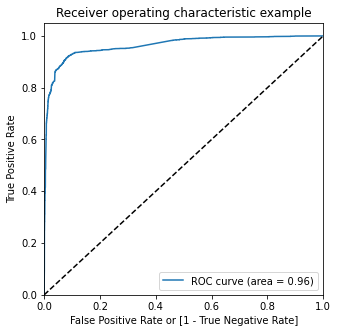

In [160]:
draw_roc( df_pred.Converted, df_pred.Converted_prob)

In [161]:
### Find Optimal Cut-Off
number = [float(x)/10 for x in range(10)]
for i in number:
    df_pred[i] = df_pred.Converted_prob.map(lambda x : 1 if x > i else 0)
    
df_pred.head()

,Converted,Converted_prob,ID,model_Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.171240,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.091520,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000429,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.938141,4750,1,1,1,1,1,1,1,1,1,1,1
4,1,0.995599,7987,1,1,1,1,1,1,1,1,1,1,1


## Various probability cutoffs.

In [162]:
## Calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame(columns = ['prob', 'accuracy', 'sensi', 'speci'])

from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(df_pred.Converted , df_pred[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
    
    





     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.796253  0.952576  0.698335
0.2   0.2  0.907574  0.936222  0.889629
0.3   0.3  0.916549  0.919460  0.914725
0.4   0.4  0.918753  0.903516  0.928297
0.5   0.5  0.920485  0.876942  0.947759
0.6   0.6  0.910093  0.826247  0.962612
0.7   0.7  0.903952  0.788635  0.976184
0.8   0.8  0.895450  0.751431  0.985659
0.9   0.9  0.870572  0.678659  0.990781


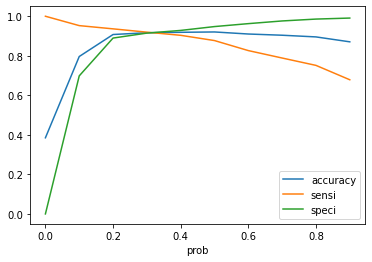

In [163]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

## Best cutoff 0.3

In [164]:
df_pred['final_predicted'] = df_pred.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

df_pred.head()

,Converted,Converted_prob,ID,model_Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.171240,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.091520,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000429,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.938141,4750,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.995599,7987,1,1,1,1,1,1,1,1,1,1,1,1


# Lead  Score Assigned 0 -100

In [165]:
### Assigning lead score
df_pred['Lead_Score'] = df_pred.Converted_prob.map(lambda x : round(x*100))


In [166]:
df_pred.head()

,Converted,Converted_prob,ID,model_Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.171240,3009,0,1,1,0,0,0,0,0,0,0,0,0,17
1,0,0.091520,1012,0,1,0,0,0,0,0,0,0,0,0,0,9
2,0,0.000429,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.938141,4750,1,1,1,1,1,1,1,1,1,1,1,1,94
4,1,0.995599,7987,1,1,1,1,1,1,1,1,1,1,1,1,100


In [167]:
X_train[col_new2].head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak Website,What is your current occupation_Unemployed,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst
3009,0,-0.160255,0,0,1,0,0,0,0,0,1,0,1,0
1012,1,-0.540048,0,0,0,0,0,0,0,0,1,0,1,0
9226,0,-0.888650,0,0,1,0,0,0,0,1,0,0,1,0
4750,0,1.643304,0,0,1,1,0,0,0,0,1,0,1,0
7987,0,2.017593,0,0,1,0,0,0,1,0,0,0,1,0


## Over All Accurecy 0.92

In [168]:
## Let check Final Overal Accuracy

metrics.accuracy_score(df_pred.Converted , df_pred.final_predicted)

0.9165485750275547

In [169]:
confusion2 = metrics.confusion_matrix(df_pred.Converted, df_pred.final_predicted)
print(confusion2)

[[3572  333]
 [ 197 2249]]


## New Confusion Matrics


In [170]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [171]:
## Sensitivity 
TP/(TP+FN)

0.919460343417825

In [172]:
## Specificity
TN/(TN+FP)

0.9147247119078105

In [173]:
## False Positive rate -- Predicting converted while customer does not have converted.
FP/float(TN+FP)


0.0852752880921895

In [174]:
## Positive Predictive value

TP/(TP+FP)

0.8710302091402014

In [175]:
## Nagative Predictive value
TN/(TN+FN)

0.9477314937649244

In [176]:
### Precision And recall Tradoff

from sklearn.metrics import precision_score, recall_score


In [177]:
precision_score(df_pred.Converted, df_pred.model_Prediction)

0.913154533844189

In [178]:
recall_score(df_pred.Converted, df_pred.model_Prediction)

0.8769419460343418

## precision_recall_curve

In [179]:
from sklearn.metrics import precision_recall_curve

In [180]:
p , r , thresholds = precision_recall_curve(df_pred.Converted , df_pred.model_Prediction)

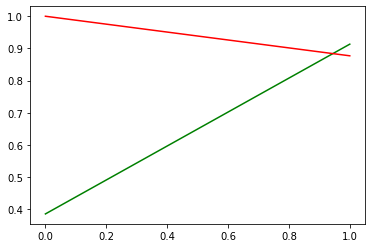

In [181]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Making Prediction on test set

In [182]:
### Making Prediction on test set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [183]:
X_test = X_test[col_new2]
X_test.head(10)

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak Website,What is your current occupation_Unemployed,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst
3271,0,-0.600595,0,0,1,0,0,0,0,0,1,0,1,0
1490,0,1.887326,0,0,0,0,0,0,0,0,1,0,0,0
7936,0,-0.752879,0,0,1,0,0,0,0,0,1,0,1,0
4216,0,-0.888650,1,0,0,0,0,1,0,0,0,0,0,0
3830,0,-0.587751,0,0,1,0,0,0,0,0,1,0,1,0
1800,0,-0.749209,0,0,0,0,0,0,0,0,1,0,0,0
6507,0,-0.651968,0,0,1,1,0,0,0,1,0,0,1,0
4821,0,0.362649,0,0,1,0,0,0,0,0,0,1,1,0
4223,0,-0.888650,1,0,1,1,0,0,0,0,1,0,0,0
4714,0,-0.888650,0,0,1,0,0,0,0,0,1,0,1,0


X_test_sm = sm.add_constant(X_test)

In [184]:
## Making model on test set
mod_tst = model1.predict(X_test_sm)
mod_tst[:10]

NameError: name 'X_test_sm' is not defined

In [ ]:
test_pred = pd.DataFrame(mod_tst)
test_pred.head()

In [ ]:
y_test_df = pd.DataFrame(Y_test)

In [ ]:
y_test_df['ID'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side 
test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, test_pred],axis=1)
y_pred_final.head()

In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['ID','Converted','Converted_Prob'], axis=1)

In [ ]:
# Let's see the head of y_pred_final
y_pred_final.head()

In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [ ]:
y_pred_final.head()

## Test model prdection accuracy Score 0.90

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

## Merge Lead Score 0 -100 to Lead dataframe

In [ ]:
### Top Three Columns
my_df1 = df_pred[['ID','Lead_Score','Converted', 'final_predicted']]
my_df1.head()

In [ ]:
df_pred.columns.values

In [ ]:
top_var = X_train[col_new2]
top_var.head()

In [ ]:
top_var['Cust_id'] = top_var.index
top_var.head()

In [ ]:
top_df = pd.merge(top_var,my_df1 , left_on='Cust_id', right_on='ID')
top_df.head()

## Final datafrmae with Lead Score

In [ ]:
top_df = top_df.sort_values("Lead_Score",axis=0 , ascending=False)
top_df.head(20)

In [185]:
## Codd is commit